In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [2]:
ZMT_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_ZMT_20_resp_2.txt', delimiter=',',unpack=True)
ZMT_CESM=np.genfromtxt('Experiments/Output/CESM_ZMT_20_resp_2.txt', delimiter=',',unpack=True)
ZMT_Pages=np.genfromtxt('Experiments/Output/Pages_ZMT_20_resp_2.txt', delimiter=',',unpack=True)

In [3]:
Lat_10,ZMT_ERA=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

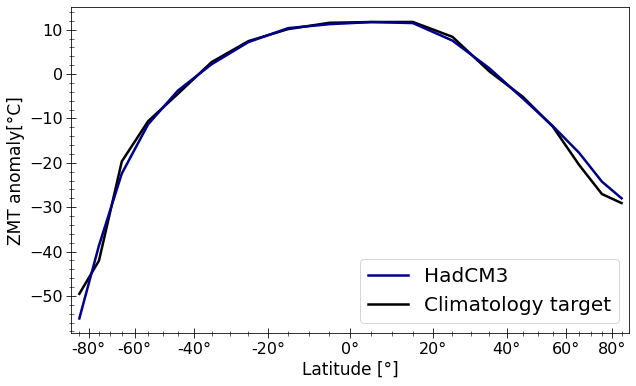

In [14]:
plt.figure(figsize=(10,6))
plt.plot(np.deg2rad(Lat_10),ZMT_HadCM3[:,0],color='darkblue',label='HadCM3',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
plt.xscale('latarea')
plt.xlabel('Latitude [°]',fontsize=17)
plt.ylabel('ZMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [4]:
GMT_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_GMT_20_resp_2.txt', delimiter=',',unpack=True)
GMT_CESM=np.genfromtxt('Experiments/Output/CESM_GMT_20_resp_2.txt', delimiter=',',unpack=True)
GMT_Pages=np.genfromtxt('Experiments/Output/Pages_GMT_20_resp_2.txt', delimiter=',',unpack=True)

In [5]:
Time_HadCM3,Target_HadCM3=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')
Time_CESM,Target_CESM=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_Pages,Target_Pages=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')

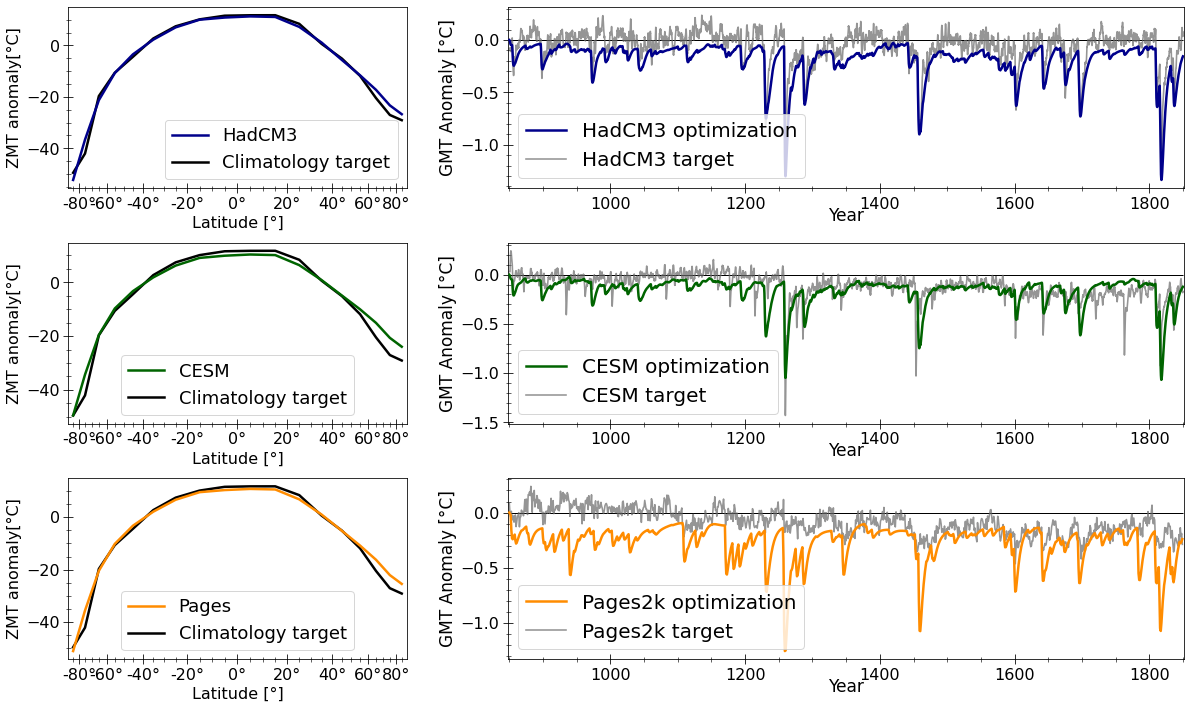

In [10]:
fig=plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 2]) 
ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])

ax[0,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3[:,-1],color='darkblue',label='HadCM3',zorder=5)
ax[0,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[0,0].set_xscale('latarea')
ax[0,0].set_xlabel('Latitude [°]',fontsize=16)
ax[0,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[0,0].legend(fontsize=18)

ax[1,0].plot(np.deg2rad(Lat_10),ZMT_CESM[:,-1],color='darkgreen',label='CESM',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[1,0].set_xscale('latarea')
ax[1,0].set_xlabel('Latitude [°]',fontsize=16)
ax[1,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[1,0].legend(fontsize=18)

ax[2,0].plot(np.deg2rad(Lat_10),ZMT_Pages[:,-1],color='darkorange',label='Pages',zorder=5)
ax[2,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[2,0].set_xscale('latarea')
ax[2,0].set_xlabel('Latitude [°]',fontsize=16)
ax[2,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[2,0].legend(fontsize=18)

ax[0,1].plot(Time_HadCM3,GMT_HadCM3[:,-1],linewidth=2.5,alpha=1,color='darkblue',label='HadCM3 optimization',zorder=5)
ax[0,1].plot(Time_HadCM3,Target_HadCM3,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3 target')
ax[0,1].set_xlim(848,1852)
ax[0,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[0,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[0,1].legend(fontsize=20)
ax[0,1].hlines(0,850,1850,linewidth=1)

ax[1,1].plot(Time_CESM,GMT_CESM[:,-1],linewidth=2.5,alpha=1,color='darkgreen',label='CESM optimization',zorder=5)
ax[1,1].plot(Time_CESM,Target_CESM,color='dimgray',linewidth=1.6,alpha=.7, label='CESM target')
ax[1,1].set_xlim(848,1852)
ax[1,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[1,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[1,1].legend(fontsize=20)
ax[1,1].hlines(0,850,1850,linewidth=1)

ax[2,1].plot(Time_Pages,GMT_Pages[:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k optimization',zorder=5)
ax[2,1].plot(Time_Pages,Target_Pages,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k target')
ax[2,1].set_xlim(848,1852)
ax[2,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[2,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[2,1].legend(fontsize=20)
ax[2,1].hlines(0,850,1850,linewidth=1)

plt.subplots_adjust(hspace=0.3)

In [50]:
P_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_P_20_resp_2.txt', delimiter=',',unpack=True)
P_CESM=np.genfromtxt('Experiments/Output/CESM_P_20_resp_2.txt', delimiter=',',unpack=True)
P_Pages=np.genfromtxt('Experiments/Output/Pages_P_20_resp_2.txt', delimiter=',',unpack=True)

In [53]:
print(P_HadCM3[:,0])
print(P_CESM[:,0])
print(P_Pages[:,0])

[3.36080213e+08 1.99110459e+02 2.50000000e+00 1.16280165e+00
 1.16479832e+00 1.15393088e+00]
[4.20000000e+08 1.79186652e+02 2.50000000e+00 1.14520573e+00
 1.15983625e+00 1.06833995e+00]
[3.83114417e+08 1.92304028e+02 2.50000000e+00 1.15933219e+00
 1.16361739e+00 1.13967602e+00]


# Parameter Experiments

In [56]:
from ZOEE.modules.optimization import optimization

In [15]:
Ptest_HadCM3_paras=[]
Ptest_HadCM3_ZMT=[]
Ptest_HadCM3_GMT=[]
for i in range(6):
    data=np.genfromtxt('Experiments/parametertest/Parametertest_HadCM3_'+str(i)+'.txt',delimiter=',')
    Ptest_HadCM3_paras.append(data[0])
    Ptest_HadCM3_ZMT.append(data[1:19])
    Ptest_HadCM3_GMT.append(data[20:])

In [43]:
Ptest_CESM_paras=[]
Ptest_CESM_ZMT=[]
Ptest_CESM_GMT=[]
for i in range(6):
    data=np.genfromtxt('Experiments/parametertest/Parametertest_CESM_'+str(i)+'.txt',delimiter=',')
    Ptest_CESM_paras.append(data[0])
    Ptest_CESM_ZMT.append(data[1:19])
    Ptest_CESM_GMT.append(data[20:])

In [44]:
Ptest_Pages_paras=[]
Ptest_Pages_ZMT=[]
Ptest_Pages_GMT=[]
for i in range(6):
    data=np.genfromtxt('Experiments/parametertest/Parametertest_Pages_'+str(i)+'.txt',delimiter=',')
    Ptest_Pages_paras.append(data[0])
    Ptest_Pages_ZMT.append(data[1:19])
    Ptest_Pages_GMT.append(data[20:])

In [53]:
Ptest_HadCM3_GMT_0=[]
Ptest_CESM_GMT_0=[]
Ptest_Pages_GMT_0=[]
for i in range(6):
    Ptest_HadCM3_GMT_0.append(np.average(Ptest_HadCM3_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    Ptest_CESM_GMT_0.append(np.average(Ptest_CESM_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    Ptest_Pages_GMT_0.append(np.average(Ptest_Pages_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))

In [31]:
np.array(Ptest_HadCM3_paras).shape

(6, 50)

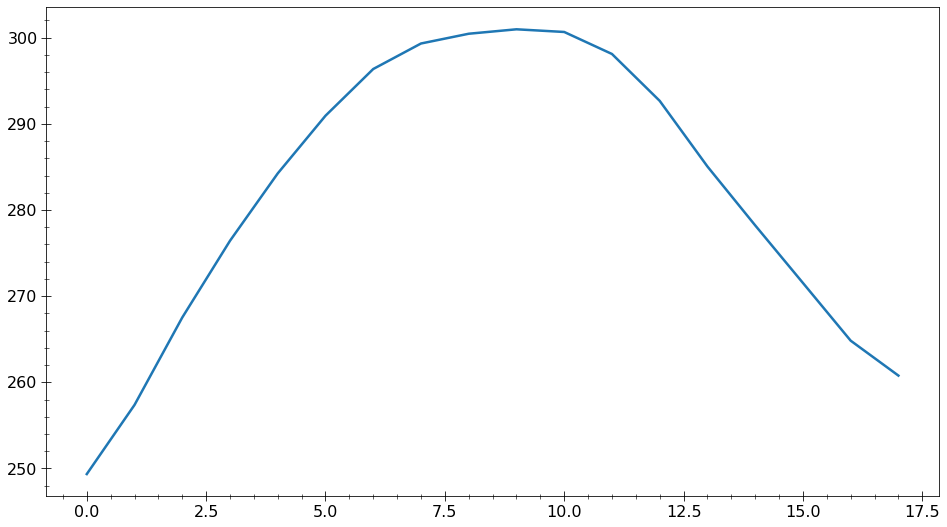

In [29]:
plt.plot(Ptest_HadCM3_ZMT[0][:,25])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [85]:
Lat_10,ZMT_ERA_raw=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMT.txt')
opt_ZMT=optimization(grid=Lat_10)
opt_ZMT.parallels=50
Ptest_CESM_ZMT[0].shape
S_ZMT_HadCM3=[]
for i in range(6):
    S_ZMT_HadCM3.append(opt_ZMT.target_comparison(np.transpose(Ptest_CESM_ZMT[i]), 'ZMT', ZMT_ERA_raw))
for i in range(6):
    for j in range(50):
        if all(np.isnan(Ptest_CESM_ZMT[i][:,j])):
            S_ZMT_HadCM3[i][j]=np.nan

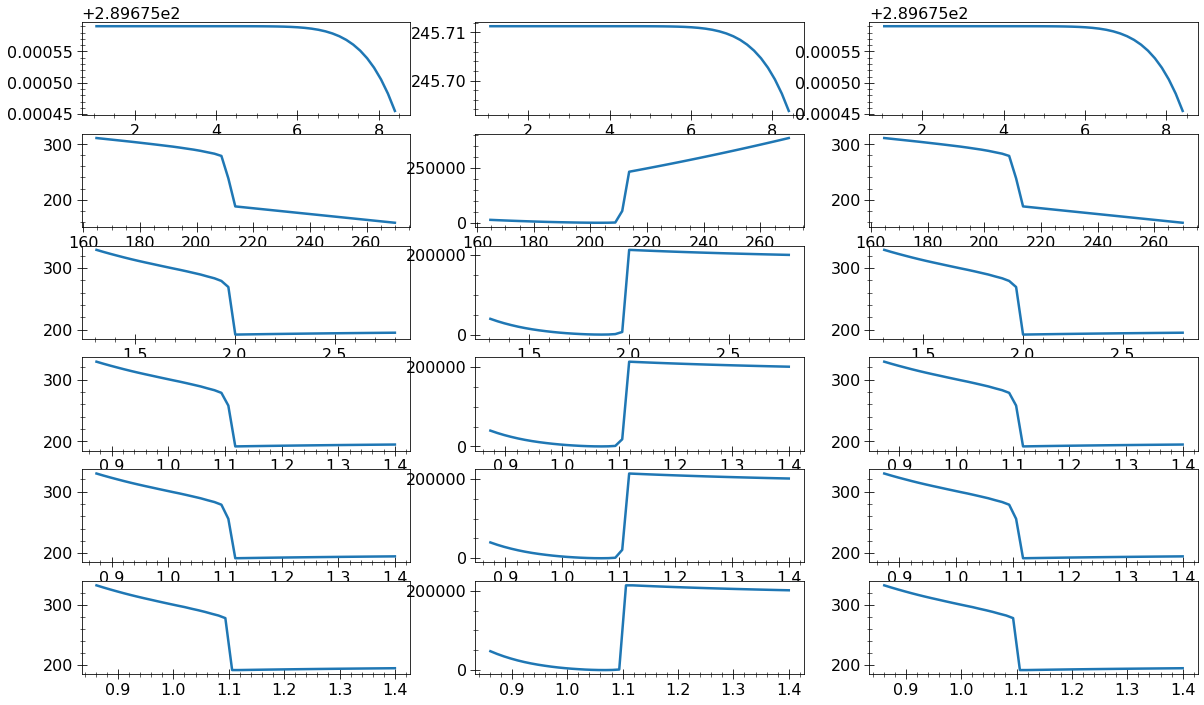

In [86]:
fig,ax=plt.subplots(6,3,figsize=(20,12))

for i in range(6):
    
    ax[i,0].plot(Ptest_HadCM3_paras[i],Ptest_HadCM3_GMT_0[i])
    
for i in range(6):
    ax[i,1].plot(Ptest_CESM_paras[i],S_ZMT_HadCM3[i])
    #ax[i,1].plot(Ptest_CESM_paras[i],Ptest_CESM_GMT_0[i])

for i in range(6):
    
    ax[i,2].plot(Ptest_Pages_paras[i],Ptest_Pages_GMT_0[i])
#gs = gridspec.GridSpec(3, 3, width_ratios=[1, 2]) 
#ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
#             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
#             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])

198.9795918367347


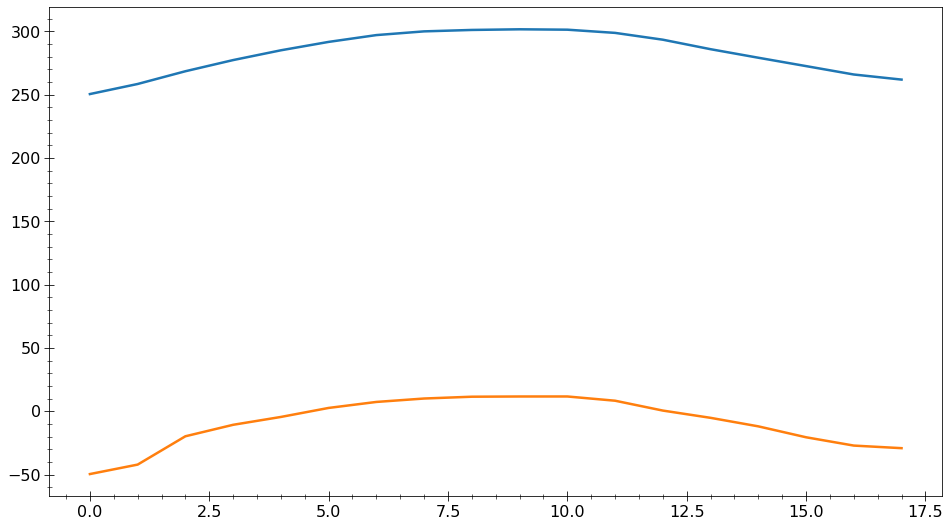

In [77]:
#i=20
plt.plot(Ptest_HadCM3_ZMT[1][:,i])
plt.plot(ZMT_ERA)
print(Ptest_HadCM3_paras[1][i])